<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/content/dam/news/images/noticies/2016/202-nova-marca-uoc.jpg", align="left" width="380" height="120">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.993 - Anàlisi de textos</p>
<p style="margin: 0; text-align:right;">Màster en Ciència de Dades</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia y Telecomunicacions</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Processament i anàlisi d'informació textual (PRA1)

A la PRA1 treballarem amb un dataset de ressenyes (opinions o reviews) i ho analitzarem seguint un conjunt de tasques: passant per la preparació i neteja de les dades, fins a l'avaluació de models de classificació de sentiments. Per tant, els objectius d‟aquesta activitat són:

- Aplicar tècniques de processament de llenguatge natural per netejar i preprocessar les dades del dataset triat.
- Implementar algorismes d'aprenentatge automàtic, com ara LDA i classificació supervisada, per analitzar els textos de les ressenyes.
- Avaluar el rendiment dels models creats, utilitzant les mètriques adequades

Per tant, en aquesta primera pràctica, revisarem i aplicarem els coneixements apresos als primers mòduls de l'assignatura. Concretament tractarem els temes següents:

<ul>
<li>1. Elecció i preparació del dataset (10%).
<li>2. Obtenció de dades (30%).
<li>3. Detecció de temes (30%).
<li>4. Classificació automàtica d'opinions positives i negatives (20%).
<li>5. Avaluació (10%).
</ul>
  
A continuació, es descriu lestructura de la pràctica a realitzar. Considereu que per cada apartat, s'han plantejat diversos exercicis a resoldre; i en alguns pocs casos, es deixa la solució per orientar una mica millor el desenvolupament.

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# 1. Elecció i preparació del dataset

## 1.1. Descripció i càrrega del dataset

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 1em;">

<strong>Exercici 1.1.1:</strong> En paraules, descriure el títol del dataset seleccionat, l'adreça original (font), i una descripció del mateix.

</div>

 * Nom del joc de dades: Large Movie Review Dataset (IMDb Movie Reviews)
 * Font: https://ai.stanford.edu/~amaas/data/sentiment/
 * Descripció: Aquest conjunt de dades conté 50.000 ressenyes de pel·lícules en anglès, etiquetades amb sentiment positiu o negatiu. Les dades estan equilibrades i dividides entre entrenament i prova, amb opinions que segueixen un criteri basat en la puntuació de la ressenya.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 1em;">

<strong>Exercici 1.1.2:</strong> Càrrega del dataset i descripció de les seves principals característiques: mida, estructura, distribució de classe/ràting, distribució de longituds de text, exploració preliminar del text de les opinions (orientada a descobrir potencials tasques de neteja a realitzar).

</div>

<b>Important</b>: En cas d'haver triat un dataset sense una columna que denoti el sentiment de cada text, però sí el rating, en aquest exercici, afegir una nova columna de sentiment. Per exemple, si tenim els valors 1 a 5 per a rating, podríem considerar els valors de 1 i 2, com a sentiment negatiu (0), i els valors 4 i 5 com a positiu (1). Per ara, ens centrarem en la classificació binària, per tant, no cal considerar els valors de sentiment “neutral” o rating=3

El dataset ha d'estar organitzat amb les carpetes 'train' i 'test', i dins 
d'aquestes, amb subcarpetes 'pos' i 'neg' que corresponen a les opinions positives 
i negatives respectivament.

Per seguir la pràctica farem dues coses
 * Reduir el nombre de resenyes a 7500 per tindre temps d'entrenament més curts
 * Unir en un únic dataframe test i training

En aquets dataset hi ha originalment 25000 resenyes positives i 25000 negatives.

Nombre de mostres reduïdes: 7500
Nombre total de ressenyes: 7500

Distribució de classes:
label
pos    3775
neg    3725
Name: count, dtype: int64

Estadístiques de longitud (nombre de paraules per ressenya):
count    7500.000000
mean      230.359467
std       170.456526
min         6.000000
25%       127.000000
50%       172.000000
75%       279.000000
max      2125.000000
Name: length, dtype: float64


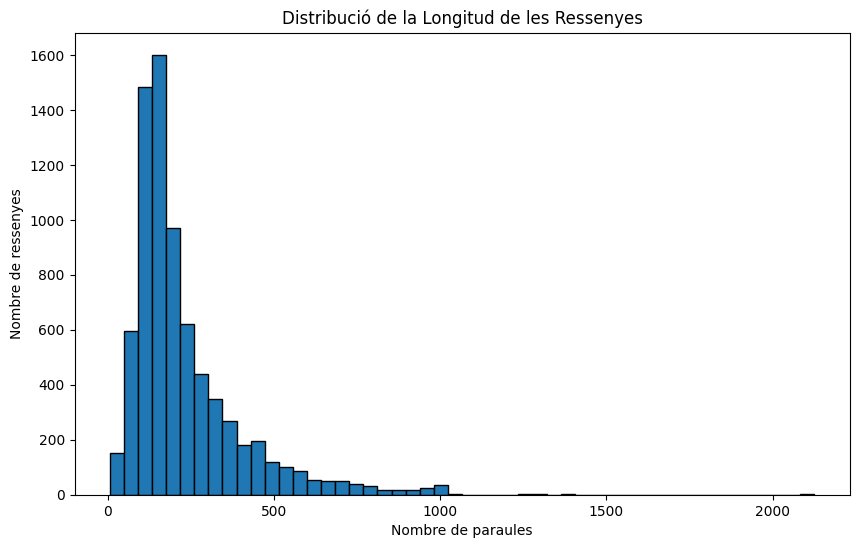


Mostra de ressenyes:
["A handful of critics have awarded this film with positive comments. I don't wish to argue with their opinion, but I strongly disagree. When I first watched this film I was mildly impressed. But after comparing it with other films, particularly with the late master, Bruce Lee I quickly changed my mind. In fact, if it wasn't for the title of the film, I would never have bought it. Game of Death 2 doesn't relate to the original Game of Death, (except it shares one character, Billy Lo.)<br /><br />I was stunned to see how similar Game of Death 2 was compared to Enter the Dragon. The plots have striking similarities: Both Bruce Lee and Bobby Lo are on a mission to avenge a relative. The two locations are similar, in which they both are very isolated and are surrounded by thousands of Blackbelts. There is an element of prostitution in both films (women are sent two the guests rooms in both films.) Both Han (Enter the Dragon) and Lewis's henchman have a hand missing. T

In [2]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

def load_reviews(data_dir):
    """
    Carrega les ressenyes d'un dataset d'opinions i retorna un DataFrame amb 
    les ressenyes, les seves etiquetes, la longitud (en nombre de paraules) de cada text, 
    i una nova columna "Positive" que val 1 si la ressenya és positiva i 0 si és negativa.
    """
    reviews = []
    labels = []
    lengths = []
    
    # Els conjunts es troben en les carpetes "train" i "test". Dintre de cada
    # una d'elles hi ha les carpetes "pos" i "neg"
    for dataset in ['train', 'test']:
        for sentiment in ['pos', 'neg']:
            path = os.path.join(data_dir, dataset, sentiment)
            # Agafem tots els fitxers de la carpeta
            files = glob.glob(os.path.join(path, '*.txt'))
            for f in files:
                with open(f, 'r', encoding='utf-8') as file:
                    text = file.read()
                    reviews.append(text)
                    labels.append(sentiment)
                    # Comptem el nombre de paraules
                    lengths.append(len(text.split()))
    
    # Creació del dataframe
    df = pd.DataFrame({
        'review': reviews,
        'label': labels,
        'length': lengths
    })
    
    # Afegim la columna "Positive": 1 per a ressenyes positives, 0 per a negatives
    df['Positive'] = df['label'].apply(lambda x: 1 if x == 'pos' else 0)
    
    return df


# Carreguem les dades
data_dir = "aclImdb_v1/aclImdb"
df = load_reviews(data_dir)
df = df.sample(n=7500, random_state=42).reset_index(drop=True)
print("Nombre de mostres reduïdes:", len(df))

# Mida i distribució
print("Nombre total de ressenyes:", len(df))
print("\nDistribució de classes:")
print(df['label'].value_counts())

# Longitud dels textos
print("\nEstadístiques de longitud (nombre de paraules per ressenya):")
print(df['length'].describe())

# Visualització dels resultats
plt.figure(figsize=(10, 6))
plt.hist(df['length'], bins=50, edgecolor='black')
plt.xlabel("Nombre de paraules")
plt.ylabel("Nombre de ressenyes")
plt.title("Distribució de la Longitud de les Ressenyes")
plt.show()

# 3 resenyes a l'atzar
print("\nMostra de ressenyes:")
print(df['review'].sample(3, random_state=42).values)

In [3]:
# Dataframe resultant
df

,review,label,length,Positive
0,Yeah I watched this mini series with My Mom an...,pos,125,1
1,I was initially forced to attend by my wife as...,pos,372,1
2,This work is striking in its accurate depictio...,pos,228,1
3,"""Atlantis: The Lost Empire"" was everything the...",pos,234,1
4,It is fitting that the title character in Sydn...,neg,100,0
...,...,...,...,...
7495,The One and the Only!<br /><br />The only real...,pos,64,1
7496,Former private eye-turned-security guard ditch...,neg,175,0
7497,"This movie is not great, but it is a good and ...",pos,160,1
7498,If you're interested in learning about the 're...,pos,47,1


Positive
1    50.333333
0    49.666667
Name: proportion, dtype: float64

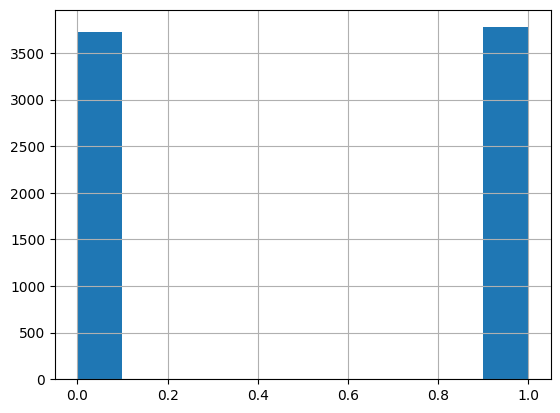

In [4]:
# Graficar histograma
df.Positive.hist()

# Distribución de calificaciones por sentimiento:
df['Positive'].value_counts(normalize=True) * 100 # valor porcentual

In [5]:
#Reseñas muy cortas:
df[df.length<10]

,review,label,length,Positive
1838,"Read the book, forget the movie!",neg,6,0


In [6]:
df = df[df['length'] > 7 ]
print("CANTIDAD TOTAL DE REVIEWS ANTES DEL FILTRADO:", df.shape[0], "\n")

CANTIDAD TOTAL DE REVIEWS ANTES DEL FILTRADO: 7499 



No hi ha ressenyes molt curtes de les que preocupar-nos

## 1.2 Neteja de text

Abans de treballar amb els textos de les ressenyes, cal netejar-los. En general, depenent del dataset podria ser necessari:

1. Eliminar mencions (@), hashtags (#), o codi HTML.
2. Eliminar pàgines web.
3. Corregir paraules mal escrites (les que ressaltin al corpus).
4. Eliminar duplicats.
5. Convertir contraccions, (per exemple, en lloc de wouldn't, es canviaria a would not).
6. Filtrar tokens no alfabètics.
7. Filtrar signes de puntuació (!) i treure espais doble. Es recomana no treure el "." perquè després es farà servir aquest signe per crear la llista de sentències. Com a referència vegeu l'exemple de PRA proporcionat (*Exemple_PRA1.ipynb*).
9. Convertir text a minúscules.

Per cada punt, fer les verificacions necessàries per determinar l'existència de cada element esmentat al punt anterior (mencions, hashtags, codi HTML, pàgines web, etc.) i implementar les accions de neteja (segons es requereixi).

<b>IMPORTANT</b>:
- Abans d'implementar qualsevol acció, se suggereix crear una columna, anomenada *text*, a partir del contingut de la columna de text original del datset triat; i sobre la nova columna aplicar les tasques de neteja.
- Per cada acció de neteja realitzada, enllistar almenys una ressenya que mostri que la funció implementada funciona. És a dir, presentar el text original i el text transformat (*text*).
- Afegir les cel·les de text i codi necessàries, de manera que es realitzi les verificacions suggerides, i es doni solució als problemes de qualitat de dades trobades. Com a orientació, es recomana revisar el fitxer <b>Exemple_PRA1.ipynb</b> per veure la millor manera d'organitzar la solució.

In [7]:
#Crear la columna 'text' per aplicar-hi les tasques de preprocessament i neteja:
df['text'] = df['review']

/tmp/ipykernel_29448/2826761890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['review']


In [8]:
import contractions
import re

print(df[df['text'].str.contains('@|#|http', case=False, na=False)].head(1)['text'].values[0])

It is fitting that the title character in Sydney White is defined from the beginning of the film by her awkwardness because the film, like the character, tends to begin every scene with a well-meant but inappropriate statement, then backtracks inadvertently making it worse and leaving the viewer in total confusion.<br /><br />This scenario gets old quick. Now imagine a hour and a half of this, throw on the most predictable storyline imaginable; add some vague Snow White and the Seven Dwarfs references and Amanda Bynes blinking in wide-eyed puzzlement and you have Sydney White...for more of my review http://www.helium.com/items/1433421-sydney-white-review


In [9]:
# Funció per eliminar contraccions (don't -> do not)
def expand_contractions(text):
    return contractions.fix(text)


# Funció per eliminar mencions (@example, #example) i HTML
def remove_mentions_hashtags_html(text):
    text = re.sub(r'@\w+', '', text)      # Elimina mencions
    text = re.sub(r'#\w+', '', text)       # Elimina hashtags
    text = re.sub(r'<[^>]+>', '', text)    # Elimina etiquetes HTML
    return text


# Funció per eliminar URLs
def remove_urls(text):
    text = re.sub(r'http\S+|www\.\S+', '', text)
    return text
    

# Funció per eliminar signes de puntuació. (deixem el punt (.))
def remove_punctuation(text):
    # Defineix els signes de puntuació a eliminar
    punctuation = ';,!"#$%&\()*+-<>@[\\]^_`{|}~?'
    text = re.sub(f"[{re.escape(punctuation)}]", " ", text)
    return text


# Funció per eliminar espais extra
def remove_extra_spaces(text):
    text = re.sub(r'\s\s+', ' ', text)
    return text.strip()


# Apliquem els canvis
df.loc[:, 'text'] = df['text'].apply(expand_contractions)
df.loc[:, 'text'] = df['text'].apply(remove_mentions_hashtags_html)
df.loc[:, 'text'] = df['text'].apply(remove_urls)
df.loc[:, 'text'] = df['text'].apply(remove_punctuation)
df.loc[:, 'text'] = df['text'].apply(lambda x: x.lower())
df.loc[:, 'text'] = df['text'].apply(remove_extra_spaces)

# Eliminar duplicats a la columna 'text'
df = df.drop_duplicates(subset='text')

# Comparativa entre text original i text netejat
sample_index = 73
print("\nText original:")
print(df.iloc[sample_index]['review'])
print("\nText netejat:")
print(df.iloc[sample_index]['text'])    


Text original:
Whether you're a fan of the series which inspired it or not, there's no denying this is a patchy piece of work. But in the best possible sense. Keen to get away from the trappings of old sitcoms which made an uneasy transition to the big screen, Messrs Pemberton, Dyson, Shearmsith and Gatiss have gone down a different road, addressing the problems of dealing with their success along with adding other creations and, inevitably, rehashing some of their best-loved characters. It's a pity they didn't stick to just a more consistent League of Gents movie because as inventive as including themselves in the screenplay is, it weakens the finished movie. Well worth renting though.

Text netejat:
whether you are a fan of the series which inspired it or not there is no denying this is a patchy piece of work. but in the best possible sense. keen to get away from the trappings of old sitcoms which made an uneasy transition to the big screen messrs pemberton dyson shearmsith and gati

# 2. Obtenció de dades

En aquesta part analitzarem el text, trobarem el conjunt de termes multiparaula rellevants del dataset i analitzarem l'objecte i aspectes de les opinions del text utilitzant el model Word2Wec. Per això començarem calculant els **millors bigrames i trigrames de les opinions del dataset i avaluar-los** segons diferents mètriques (PMI i Likehood). Posteriorment, detectarem els **n-grames que compleixin un patró sintàctic d'un sintagma nominal** (e.g: adjectiu + nom en singular/plural, nom + nom i nom en singular/plural) i acabarem **detectant col·locacions** amb un model de detecció de frases, per exemple amb el mòdul Phraser de Gensim. Un cop analitzats els termes multiparaula, **crearem un model word2vec** amb les opinions lematitzades i l'utilitzarem per analitzar els targets de les opinions.

In [10]:
# Per a aquest apartat cal carregar les llibreries següents:
import nltk
nltk.download('all')
from nltk import pos_tag, word_tokenize
from nltk.collocations import *

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/win001/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/win001/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/win001/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/win001/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/win001/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_dat

In [11]:
#Importar la llista de stopwords a l'idioma dels *reviews* de la llibreria NLTK i afegim algunes addicionals:
stopwords =  ["would"]
stopwords = stopwords + nltk.corpus.stopwords.words('english')
stopwords[:15] # extracto de stopwords.

['would',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren']

### 2.1. Detecció de col·locacions

Les col·locacions són termes multiparaula, és a dir, seqüències de paraules que, en conjunt, tenen un significat que difereix significativament del significat de cada paraula individual (e.g. "free version").

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 1em;">

<strong>Exercici 2.1.1:</strong> Calcular els millors bigrames i trigrames de les opinions. Dels millors bigrames i trigrames, escull els que no comencen, ni acaben amb una stopword.
<br>
<b>Sortida esperada:</b> Imprimir els primers 20 n-grams obtinguts amb cada mètrica.
</div>
<br>
<b>Passos a realitzar</b>:

- Obtenir els tokens del text de les opinions i etiquetar-los pel seu PoS
- Aplicar les mètriques PMI i Likehood Ratio per calcular els millors bigrames i els millors trigrames a partir dels tokens etiquetatge iels que no comencen ni terennen amb una stopword.

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    
<i>Primer pas</i>: Obtenir els tokens del text de les ressenyes. Etiqueta aquests tokens pel seu PoS.

Utilitza els mètodes *word_tokenize* per tokenitzar el text de les ressenyes i *pos_tag* per determinar l'etiqueta de cada token.
<br>
<b>Sortida esperada:</b> Imprimeix els deu primers tokens, amb la seva respectiva etiqueta:
</div>
<br>
Abans de categoritzar els tokens pel seu tag POS, primer convertirem el text a minúscules:

In [12]:
#Creem text en minúscula que reculli totes les ressenyes.
#A les següents línies df és el dataframe on es va carregar el dataset, i text és la columna que té el text preprocessat.
#Se suggereix actualitzar la línia següent amb els objectes propis i fer córrer les instruccions.
opinions = " ".join(df['text']).lower()
opinions[:250]

'yeah i watched this mini series with my mom and dad as a kid. it was one of the few mini series that my 9 year old mind actually could follow. i recall it was very well done and did not necessarily have the feel of the typical crap mini series. it wa'

In [13]:
#############################################
# SOLUCIÓ PAS 1                           #
#############################################

# Obtenció de les etiquetes POS per a cada token
tokens = word_tokenize(opinions)
tagged_tokens = pos_tag(tokens)

In [14]:
print("\nPrimeres 10 tuples (token, PoS):")
print(tagged_tokens[:10])


Primeres 10 tuples (token, PoS):
[('yeah', 'NN'), ('i', 'NN'), ('watched', 'VBD'), ('this', 'DT'), ('mini', 'NN'), ('series', 'NN'), ('with', 'IN'), ('my', 'PRP$'), ('mom', 'NN'), ('and', 'CC')]


<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    
<i>Segon pas</i>: Calcular els 300 millors bigrames i els 300 millors trigrames a partir dels tokens etiquetats (e.g. [(we, PRP), ...]) del text. Utilitza les mètriques PMI i Likehood Ratio.
<br>
<b>Condició</b>: De la llista de millors bigrames i trigrames, escull els que no comencen ni acabin amb una stopword. Per al filtratge de stopwords considera:
- La llista prèviament carregada (des del paquet NLTK), i
- Les categories POS que representen paraules buides com a determinants, preposicions, entre d'altres.
<br>
<b>Sortida esperada:</b> Imprimeix els primers 20 n-grams obtinguts amb cada mètrica.
</div>

Recordeu la classificació d'etiquetes PoS.

<b>Etiquetes PoS</b>

<ul>
<li>DT: Determinant</li>
<li>JJ: Adjectiu</li>
<li>NN: Nom en singular</li>
<li>NNS: Nom en plural</li>
<li>VBD: Verb en passat</li>
<li>VBG: Verb en gerundi</li>
<li>MD: Verb modal</li>
<li>IN: Preposició o conjunció subordinada</li>
<li>PRP: Pronom</li>
<li>RB: Adverbi</li>
<li>RP: Partícula</li>    
<li>CC: Conjunció coordinada</li>
<li>CD: Numeral</li>
</ul>

In [15]:
#Carreguem les mètriques per al càlcul de bigrames i trigrames:

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

##############################################
# SOLUCIÓ PAS 2 #
##############################################

ngrams_num = 300

words = [word for word, tag in tagged_tokens]

# Funció per verificar n-grama (no comença ni acaba amb una stopword o amb POS buits)
def valid_ngram(ngram):
    # Mirem si la primera o l'última paraula està en la llista de stopwords
    if ngram[0].lower() in stopwords or ngram[-1].lower() in stopwords:
        return False
    # Mirem si la primera o l'última paraula té etiqueta POS buida (ex. determinants, preposicions)
    pos_first = nltk.pos_tag([ngram[0]])[0][1]
    pos_last = nltk.pos_tag([ngram[-1]])[0][1]
    if pos_first in ['DT', 'IN'] or pos_last in ['DT', 'IN']:
        return False
    return True

In [16]:
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures

# BIGRAMES

bigram_finder = BigramCollocationFinder.from_words(words)

# 300 millors segons PMI
top300_bigrams_pmi = bigram_finder.nbest(BigramAssocMeasures.pmi, ngrams_num)

# Likelihood Ratio
bigram_finder = BigramCollocationFinder.from_words(words)
top300_bigrams_ll = bigram_finder.nbest(BigramAssocMeasures.likelihood_ratio, ngrams_num)

# Filtrar per no començar ni acabar amb stopwords o POS buits
filtered_bigrams_pmi = [bg for bg in top300_bigrams_pmi if valid_ngram(bg)]
filtered_bigrams_ll = [bg for bg in top300_bigrams_ll if valid_ngram(bg)]

print("Primers 20 bigrames per PMI:")
for bg in filtered_bigrams_pmi[:20]:
    print(bg)

print("\nPrimers 20 bigrames per Likelihood Ratio:")
for bg in filtered_bigrams_ll[:20]:
    print(bg)

Primers 20 bigrames per PMI:
("'90s/early", "'00s")
("'achcha", 'pitaji')
("'aldar", 'kose')
("'alka", 'fizz')
("'apadi", 'podu')
("'carl", 'spackler')
("'chokher", 'bali')
("'clickety", 'clack')
("'club", '905')
("'coon", 'huntin')
("'deewana", 'mastana')
("'den", 'brysomme')
("'dewey", 'cheetam')
("'donna", 'snartlebutt')
("'drill", 'seargent')
("'errol", 'flynt')
("'eureka", 'maru')
("'faux", 'terribles')
("'greenhouse", "effect'before")
("'iedereen", 'beroemd')

Primers 20 bigrames per Likelihood Ratio:
('special', 'effects')
('.', '.')
('low', 'budget')
('sci', 'fi')
('ever', 'seen')
('let', 'us')
('new', 'york')
('year', 'old')
('years', 'ago')
('movie', '.')
('high', 'school')
('.', 'however')
('much', 'better')
('real', 'life')
('martial', 'arts')
('main', 'character')
('film', '.')
('pretty', 'much')
('years', 'later')


In [17]:
# TRIGRAMES

trigram_finder = TrigramCollocationFinder.from_words(words)

# 300 millors segons PMI
top300_trigrams_pmi = trigram_finder.nbest(TrigramAssocMeasures.pmi, ngrams_num)

# Likelihood Ratio
trigram_finder = TrigramCollocationFinder.from_words(words)
top300_trigrams_ll = trigram_finder.nbest(TrigramAssocMeasures.likelihood_ratio, ngrams_num)

# Filtrar els trigrames que compleixin la condició (només primer i últim token)
filtered_trigrams_pmi = [tg for tg in top300_trigrams_pmi if valid_ngram(tg)]
filtered_trigrams_ll = [tg for tg in top300_trigrams_ll if valid_ngram(tg)]

print("\nPrimeres 20 trigrames per PMI:")
for tg in filtered_trigrams_pmi[:20]:
    print(tg)

print("\nPrimeres 20 trigrames per Likelihood Ratio:")
for tg in filtered_trigrams_ll[:20]:
    print(tg)


Primeres 20 trigrames per PMI:
("'den", 'brysomme', 'mannen')
("'shark", 'fralick', 'sangster')
('.colonel', 'marmaduke', 'oldfish')
('2.carrie', '3.scream', '4.any')
('7/10molly', 'celaschi', 'myspace.com/horroryearbook')
('a.żmijewski', 'd.stenka', 'm.komorowska')
('aan', 'pyasa', 'kagaz')
('abdul', 'salam', 'yusoufzai')
('adi', 'hasak', 'ric')
('aimée', 'giulia', 'boschi')
('alpert', 'sayid', 'jarrah')
('ammmmm', 'daaaarrrkk', 'heeeeaaarrt')
('antietam', 'gettysburg', 'appomatox')
('arcaica', 'proibido', 'proibir')
('assef', 'elham', 'ehsas')
('auger', 'grégori', 'deràngere')
('baleful', 'kô', 'nishimura')
('battlecry', 'buza', 'chika')
('bonita', 'granville', 'nacy')
('bunuels', 'chien', 'andalou')

Primeres 20 trigrames per Likelihood Ratio:
('.', 'this', 'movie')


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Exercici 2.1.2:</strong> Detectar n-grames que compleixen el patró sintàctic d'un sintagma nominal (e.g: adjectiu + nom en singular/plural, nom + nom i nom en singular/plural). Les paraules components de cada n-grama han d'estar separades per un guió "-".
<br>
<b>Sortida esperada:</b> Llista dels 20 primers n-grames que compleixin el patró sintàctic especificat, per exemple, 'new_york' i 'tourism'.

</div>

In [18]:
#############################################
# SOLUCIÓ                                  #
#############################################

noun_phrases = []

# Bigrames:
#  - adjectiu i després nom (JJ -> NN/NNS)
#  - nom i després nom (NN/NNS -> NN/NNS)
for i in range(len(tagged_tokens) - 1):
    word1, pos1 = tagged_tokens[i]
    word2, pos2 = tagged_tokens[i + 1]
    if (pos1 == 'JJ' and pos2 in ['NN', 'NNS']) or (pos1 in ['NN', 'NNS'] and pos2 in ['NN', 'NNS']):
        noun_phrases.append(word1 + "_" + word2)

# Trigrames:
#  - (JJ, NN/NNS, NN/NNS) o (NN/NNS, NN/NNS, NN/NNS)
for i in range(len(tagged_tokens) - 2):
    word1, pos1 = tagged_tokens[i]
    word2, pos2 = tagged_tokens[i + 1]
    word3, pos3 = tagged_tokens[i + 2]
    if ((pos1 == 'JJ' and pos2 in ['NN', 'NNS'] and pos3 in ['NN', 'NNS']) or
            (pos1 in ['NN', 'NNS'] and pos2 in ['NN', 'NNS'] and pos3 in ['NN', 'NNS'])):
        noun_phrases.append(word1 + "_" + word2 + "_" + word3)

# Eliminem duplicats
unique_noun_phrases = []
for phrase in noun_phrases:
    if phrase not in unique_noun_phrases:
        unique_noun_phrases.append(phrase)
    if len(unique_noun_phrases) >= 20:
        break

print("Primeres 20 n-grams (sintagmes nominals) que compleixen el patró:")
for phrase in unique_noun_phrases[:20]:
    print(phrase)      

Primeres 20 n-grams (sintagmes nominals) que compleixen el patró:
yeah_i
mini_series
few_mini
old_mind
typical_crap
crap_mini
original_concept
plot_twists
history_channel
royal_families
visual_aspect
many_ways
dumpy_woman
bright_intelligent
early_years
young_woman
true_love
passionate_relationship
sound_performances
historical_accuracy


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 1em;">

<strong>Exercici 2.1.3:</strong> Detectar col·locacions amb un model de detecció de frases, amb el mòdul Phraser de Gensim. Entrenar el model amb totes les opinions.
<br>
</div>
<br>
<b>Passos a realitzar</b>:

1. Crear la llista de sentències. Prendre com a referència el codi comentat que consta a la cel·la següent.
2. Convertir les ressenyes en una llista de phrases. Les phrases no han de ser stopwords. Tampoc no han de començar ni acabar amb una stopword.
3. Entrenar el model amb totes les opinions.

In [19]:
#Crear la lista de sentences. Las siguientes líneas pueden ser tomadas como referencia
#Actualizar el nombre del dataframe y de la columna del texto pre-procesado.#
opinions_string = " ".join(df['text'])

opinion_sentences = opinions_string.split('. ')

opinion_sentences[:10]

def valid_sentence(sent):
    tokens = nltk.word_tokenize(sent)
    if not tokens:
        return False
    # Mirem si primera i l'última paraula no son stopwords
    return (tokens[0] not in stopwords) and (tokens[-1] not in stopwords)

filtered_sentences = [sent for sent in opinion_sentences if valid_sentence(sent)]
print("Primeres 10 sentències filtrades:")
print(filtered_sentences[:10])    

Primeres 10 sentències filtrades:
['yeah i watched this mini series with my mom and dad as a kid', 'although most twists in this movie are either spelled out or predictable it is still worth the time', 'although viewers should not expect to be electrified this film is very well made and the visual aspect is second to none', 'spoiler alert the historical accuracy is somewhat questionable as at no time did prince albert get shot while defending victoria', 'though this is a broad generalization parents of that time were too self absorbed to be real parents and those who were home tended to be far too distracted from the real issues where their children were concerned', "baio's skateboarding through a pack of goons and outrunning them was meant to show us that the troubled times will pass and we are meant to get through them to better times.the whole metaphor of moving on and the procession of life is present throughout the film and serves to give us hope in the end.i like this movie thoug

In [20]:
from gensim.models.phrases import Phrases, Phraser

# Entrenar el model de detecció de frases
phrases_model = Phrases([nltk.word_tokenize(sent) for sent in filtered_sentences],
                         min_count=5, threshold=10)
phraser = Phraser(phrases_model)

# Detectar col·locacions a les sentències tokenitzades
collocated_sentences = [phraser[nltk.word_tokenize(sent)] for sent in filtered_sentences]

print("\nExemple d'una sentència amb col·locacions detectades:")
print(collocated_sentences[0])


Exemple d'una sentència amb col·locacions detectades:
['yeah', 'i_watched', 'this', 'mini_series', 'with', 'my', 'mom', 'and', 'dad', 'as', 'a', 'kid']


<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segon pas</i>: Converteix les ressenyes en una llista de *phrases*. Les phrases no han de ser stopwords. Tampoc no han de començar, ni acabar amb una stopword. Fes servir la llista de stopwords per al filtratge.
<br>
<b> Sortida esperada:</b> Llista de les 20 primeres phrases* que no siguin, o no continguin stopwords.

</div>

In [21]:
from gensim.models.phrases import Phraser
from gensim.models import Phrases

#############################################
# SOLUCIÓ PAS 2                           #
#############################################

opinions_string = " ".join(df['text'])
opinion_sentences = opinions_string.split('. ')

# Funció per determinar si una sentència és vàlida:
# - No és buida.
# - No comença ni acaba amb una stopword.
def valid_sentence(sent):
    tokens = nltk.word_tokenize(sent)
    if not tokens:
        return False
    # Mirem que la primera i l'última paraula no siguin stopwords
    if tokens[0] in stopwords or tokens[-1] in stopwords:
        return False
    return True


# Filtrem
filtered_sentences = [sent for sent in opinion_sentences if valid_sentence(sent)]

print("Primeres 20 sentències filtrades:")
for sent in filtered_sentences[:20]:
    print(sent)    

Primeres 20 sentències filtrades:
yeah i watched this mini series with my mom and dad as a kid
although most twists in this movie are either spelled out or predictable it is still worth the time
although viewers should not expect to be electrified this film is very well made and the visual aspect is second to none
spoiler alert the historical accuracy is somewhat questionable as at no time did prince albert get shot while defending victoria
though this is a broad generalization parents of that time were too self absorbed to be real parents and those who were home tended to be far too distracted from the real issues where their children were concerned
baio's skateboarding through a pack of goons and outrunning them was meant to show us that the troubled times will pass and we are meant to get through them to better times.the whole metaphor of moving on and the procession of life is present throughout the film and serves to give us hope in the end.i like this movie though i do not watch 

## 2.2 Vectorització de paraules i termes amb Word2Vec

Abans de desenvolupar els exercicis, cal importar gensim i treure espais del text. (ja està fet)

In [22]:
opinion_phrases_no_stopwords = []
for sentence in collocated_sentences:
    for token in sentence:
        if '_' in token:
            opinion_phrases_no_stopwords.append(token)

opinion_phrases_stripped_no_stopwords = [c.strip() for c in opinion_phrases_no_stopwords]
print(opinion_phrases_stripped_no_stopwords[:10])

['i_watched', 'mini_series', 'this_movie', 'not_expect', 'to_be', 'this_film', 'very_well', 'spoiler_alert', 'to_be', 'those_who']


In [23]:
# Importar el paquet gensim, que implementa un mètode per entrenar models Word2Vec.

import gensim

#Abans de continuar se suggereix treure espais del text: considerar el codi comentat següent.
#Considereu que, opinion_phrases_no_stopwords és l'objecte generat en el segon pas de l'Exercici 2.1.3.

opinion_phrases_stripped_no_stopwords = [c.strip() for c in opinion_phrases_no_stopwords]
opinion_phrases_stripped_no_stopwords[:10]

['i_watched',
 'mini_series',
 'this_movie',
 'not_expect',
 'to_be',
 'this_film',
 'very_well',
 'spoiler_alert',
 'to_be',
 'those_who']

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Exercici 2.2.1:</strong> Obtenir targets de les opinions i els seus aspectes utilitzant el model Word2vec.
<br>
<b>Sortida esperada:</b> Llista dels primers 15 termes que tinguin més relació semàntica amb el terme/aspecte seleccionat.
</div>
<br>

Passos a realitzar:
1. Convertir les frases de cada oració en un token.
2. Crear una sentence stream on tots els tokens de les oracions estiguin lematitzats. Els tokens no poden ser stopwords ni tenir un stopword al començament o al final.
3. Crear un model word2vec de les opinions lematitzades. El model s'ha de dir w2v_opinions.
4. A partir del vocabulari del model word2vec, seleccionar possibles aspectes representatius de les opinions.

<b><i>Primer pas</i></b>: Convertir les phrases de cada oració en un token. Per completar aquest pas:

- Concatenar els tokens de la phrase amb el caràcter '_' (e.g: 'mew york' -> 'new_york').
- En cada oració substituir els bigrames que són phrases per la forma tokenitzada (e.g: Aquesta és una best apps acordada amb un grup de persones -> Aquesta one of the best_apps és acordada amb un conjunt de persones).
- En fer els passos anteriors, les col·locacions formaran part del vocabulari del model word2vec que generarem.

<i>Important:</i> El codi següent es pot prendre com a referència per completar aquest primer pas. Considereu que:

- *opinion_phrases_stripped_no_stopwords* és l'objecte creat en iniciar aquest apartat (2.2).
- *opinion_sentences* és la llista de sentències creada al primer pas de l'Exercici 2.1.3.

In [24]:
from nltk.util import ngrams

# collocation_phrases = [phrase for phrase in list(set(opinion_phrases_stripped_no_stopwords)) if ' ' in phrase]
collocation_phrases = [phrase for phrase in list(set(opinion_phrases_stripped_no_stopwords)) if '_' in phrase]
print(collocation_phrases[9])

def transform_sentence(sentence):
    transformed_sentence = sentence
    n_grams = list(ngrams(nltk.word_tokenize(sentence), 2))
    ngrams_t = [' '.join(gram) for gram in n_grams]
    for ngram in ngrams_t:
        if ngram.lower() in collocation_phrases:
            opt = ngram.replace(' ', '_')
            transformed_sentence = transformed_sentence.replace(ngram,opt)
    return transformed_sentence

opinion_sentences_transformed = [transform_sentence(os) for os in opinion_sentences]
opinion_sentences_transformed[0]

sit_back


'yeah i watched this mini series with my mom and dad as a kid'

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segon pas</i>: Crear una sentence stream on tots els tokens de les oracions estiguin lematitzats. Els tokens no poden ser stopwords ni tenir un stopword al començament o al final. Per simplificar la tasca, podem considerar que el lema d'una col·locació no canvia i el seu PoS és col. (e.g: ['We run a top of the line system utilizing Windows 10 Pro'] -> [run', 'top', 'line', 'system', 'utilize', 'window', 'pro]).
<br>
<b> Sortida esperada:</b> Llista dels 10 primers tokens lematitzats (que no siguin, ni continguin stopwords).

</div>

In [25]:
##############################################
# SOLUCIÓ #
##############################################

#Importar els mètodes de la llibreria NLTK que lematitzen segons Wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords as nltk_stopwords

#Per obtenir el lema, el terme ha de tenir una etiqueta PoS. El format de l'etiqueta PoS de Wordnet és
#diferent de l'etiqueta del pos tagger de NLTK

stopwords_list = set(nltk_stopwords.words('english'))

# Funció per convertir l'etiqueta del pos tagger de NLTK a WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()

def process_sentence(sentence):
    tokens = word_tokenize(sentence)
    pos_tokens = pos_tag(tokens)
    
    lemmatized_tokens = []
    for token, tag in pos_tokens:
        token_lower = token.lower()
        # Si stopword -> descartem
        if token_lower in stopwords_list:
            continue
        
        if '_' in token_lower:
            # No comença amb stopword
            parts = token_lower.split('_')
            if parts[0] in stopwords_list or parts[-1] in stopwords_list:
                continue
            lemma = token_lower
        else:
            wn_tag = get_wordnet_pos(tag)
            lemma = lemmatizer.lemmatize(token_lower, wn_tag)
        lemmatized_tokens.append(lemma)
    return lemmatized_tokens

sentence_stream = []
for sentence in opinion_sentences_transformed:
    tokens = process_sentence(sentence)
    sentence_stream.extend(tokens)

print(sentence_stream[:10])

['yeah', 'watch', 'mini', 'series', 'mom', 'dad', 'kid', 'one', 'mini', 'series']


<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Tercer pas</i>: Crear un model word2vec de les opinions lematitzades. El model s'ha de dir w2v_opinions.
<br>
<b> Sortida esperada:</b> Presentar la quantitat d'oracions usades al model (usa l'atribut *corpus_count*).
</div>

In [26]:
#############################################
# SOLUCIÓ                                   #
#############################################

from gensim.models import Word2Vec

tokenized_sentences = [process_sentence(sentence) for sentence in opinion_sentences_transformed]

# Entrenar el model Word2Vec
w2v_opinions = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4
)

print("Nombre d'oracions utilitzades en el model:", w2v_opinions.corpus_count)

Nombre d'oracions utilitzades en el model: 73193


<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Quart pas</i>: A partir del vocabulari del model word2vec, seleccionar possibles aspectes de la ressenya (e.g: desktop) i llista els termes semànticament relacionats amb aquests aspectes segons aquest model.
<br>

<b>Sortida esperada:</b> Llista els primers 20 termes que tinguin més relació semàntica amb un terme rellevant del domini.
</div>

In [27]:
##############################################
# SOLUCIÓ                                    #
##############################################

# Vocabulari del model d'opinions
vocab = list(w2v_opinions.wv.key_to_index.keys())
print("Alguns termes del vocabulari:")
print(vocab[:20])

aspect = 'story'

# Extreure els 20 termes més semblants
if aspect in w2v_opinions.wv:
    related_terms = w2v_opinions.wv.most_similar(aspect, topn=20)
    print(f"\nTermes més relacionats amb '{aspect}':")
    for term, score in related_terms:
        print(f"{term}: {score:.4f}")
else:
    print(f"\nEl terme '{aspect}' no existeix al vocabulari del model.")

Alguns termes del vocabulari:
['movie', 'film', "'s", 'one', 'make', 'like', 'see', 'good', 'get', 'would', 'time', 'character', 'go', 'watch', 'bad', 'well', 'even', 'story', 'think', 'really']

Termes més relacionats amb 'story':
plot: 0.7660
characters.the: 0.7105
interesting.the: 0.7066
interest: 0.7020
straddle: 0.6988
along: 0.6909
event: 0.6888
twist: 0.6879
storyline: 0.6671
premise: 0.6641
groaner: 0.6632
element: 0.6622
paradigm: 0.6595
concept: 0.6581
movie.what: 0.6574
tale: 0.6574
line: 0.6572
cohesion: 0.6558
unbelievable.the: 0.6544
situation: 0.6498


# 3. Detecció de temes

En aquesta part ens dedicarem a explorar els temes detectats utilitzant WordNet i farem l'extracció de temes a partir de LDA.

## 3.1 Exploració dels temes amb WordNet

Per accedir a Wordnet, utilitzeu la llibreria nltk.

In [28]:
from nltk.corpus import wordnet as wn

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Exercici 3.1.1:</strong> Comprovar si, segons Wordnet, hi ha aspectes que estan allunyats semànticament del sentit del target, encara que en el model word2vec siguin similars. Comprovar calculant la similitud de Wu and Palmer entre el sentit de wordnet del terme elegit (i.e 'word.n.01') i alguns dels seus aspectes.
<br>
<b> Sortida esperada: </b>
<br>
- Llista de dos termes que segons Wordnet no estiguin tan propers, i el seu respectiu resultat de similitud, i
<br>
- Llista dels mateixos termes que segons el model *word2vec* estan més propers.

</div>

In [29]:
from nltk.corpus import wordnet as wn

# Triem el aspect
aspect = 'story'

# Termes propers segons word2vec
if aspect in w2v_opinions.wv:
    related_terms = w2v_opinions.wv.most_similar(aspect, topn=20)
    print(f"Termes més propers segons Word2Vec a '{aspect}':")
    for term, score in related_terms[:5]:
        print(f"{term}: {score:.4f}")
else:
    print(f"El terme '{aspect}' no existeix al vocabulari del model.")

# Agafem dos termes propers
term1 = related_terms[0][0]
term2 = related_terms[1][0]

aspect_synset = wn.synset('story.n.01')

# Per cada terme, busquem si existeix un synset relacionat amb el significat correcte
def get_first_noun_synset(word):
    synsets = wn.synsets(word, pos=wn.NOUN)
    return synsets[0] if synsets else None

synset1 = get_first_noun_synset(term1)
synset2 = get_first_noun_synset(term2)

# Calculem la similitud de Wu & Palmer
if synset1:
    similarity1 = aspect_synset.wup_similarity(synset1)
else:
    similarity1 = None

if synset2:
    similarity2 = aspect_synset.wup_similarity(synset2)
else:
    similarity2 = None

print(f"\nSimilitud de Wu & Palmer amb '{aspect}':")
if similarity1 is not None:
    print(f"{term1}: {similarity1:.4f}")
else:
    print(f"{term1}: No s'ha trobat synset a WordNet.")

if similarity2 is not None:
    print(f"{term2}: {similarity2:.4f}")
else:
    print(f"{term2}: No s'ha trobat synset a WordNet.")

print(f"\nSimilituds segons Word2Vec per '{aspect}':")
print(f"{term1}: {w2v_opinions.wv.similarity(aspect, term1):.4f}")
print(f"{term2}: {w2v_opinions.wv.similarity(aspect, term2):.4f}")

Termes més propers segons Word2Vec a 'story':
plot: 0.7660
characters.the: 0.7105
interesting.the: 0.7066
interest: 0.7020
straddle: 0.6988

Similitud de Wu & Palmer amb 'story':
plot: 0.2667
characters.the: No s'ha trobat synset a WordNet.

Similituds segons Word2Vec per 'story':
plot: 0.7660
characters.the: 0.7105


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Exercici 3.1.2:</strong> Identificar els termes monoparaula del vocabulari de word2vec que no són a Wordnet. Filtrar els termes que siguin noms o adjectius.

Del conjunt de termes identificats, cal esmentar:
- Abreviatures o termes específics del domini o expressions típiques de l'argot tech.<br>

<b>Sortida esperada:</b>
<br>
- Quantitat de termes que no consten a Wordnet.
- Llista dels 20 primers termes monoparaula que no consten a <i>Wordnet</i>.
- Llista d'almenys 3 termes dels enlistats que, siguin inherents al vocabulari programari.
</div>

In [30]:
# Agafem tot el vocabulari del model
vocab = list(w2v_opinions.wv.key_to_index.keys())

# Filtrem
single_word_vocab = [word for word in vocab if '_' not in word]
tagged_words = nltk.pos_tag(single_word_vocab)
nouns_adjectives = [word for word, pos in tagged_words if pos in ['NN', 'NNS', 'JJ']]

# Filtrem les que no estan a wornet
not_in_wordnet = [word for word in nouns_adjectives if not wn.synsets(word)]

print(f"Quantitat de termes monoparaula (noms o adjectius) que no consten a WordNet: {len(not_in_wordnet)}\n")

print("Primers 20 termes monoparaula que no consten a WordNet:")
print(not_in_wordnet[:20])

domain_terms = []
for term in not_in_wordnet:
    try:
        # Mirem si la paraula té bona similitud amb conceptes clau
        similarity_to_film = w2v_opinions.wv.similarity(term, 'film')
        similarity_to_movie = w2v_opinions.wv.similarity(term, 'movie')
        # Si similitud> 0.4 la considerem del domini
        if similarity_to_film > 0.4 or similarity_to_movie > 0.4:
            domain_terms.append(term)
        if len(domain_terms) >= 3:
            break
    except KeyError:
        continue

print("\nLlista de 3 termes inherents al vocabulari del domini cinema/narrativa:")
print(domain_terms)

Quantitat de termes monoparaula (noms o adjectius) que no consten a WordNet: 5722

Primers 20 termes monoparaula que no consten a WordNet:
['..', 'something', 'anything', 'anyone', 'everything', 'everyone', 'others', 'etc', '\x96', 'dr', 'towards', 'richard', 'imdb', 'fi', 'joe', 'william', 'charlie', 'jane', 'everybody', 'cgi']

Llista de 3 termes inherents al vocabulari del domini cinema/narrativa:
['..', 'something', 'anything']


Fem una tria manual, ja que els termes son molt generics:

In [31]:
domain_terms = ['imdb', 'cgi', 'fi']

## 3.2. LDA

Aquest apartat té com a objectiu comparar diferents models LDA i triar el més adequat de manera justificada.

<b>Passos a seguir:</b>

1. Convertir les opinions transformades en llistes de noms i col·locacions.
2. Extreure temes a partir de les llistes de noms i col·locacions de cada oració transformada. Triar 3 dels millors experiments, segons el paràmetre *num_topics*, i presentar-ne els resultats. Assigna noms als temes trobats.
3. Utilitzar la llibreria pyLDAvis per visualitzar els tòpics del millor model que vas trobar.

<i>Primer pas</i>: Convertir les opinions transformades (opinion_sentences_transformed) en llistes de noms i col·locacions. Això és necessari ja que els noms i les col·locacions expressen els temes de les opinions (e.g: [['This és una de les millors opinions') -> ['one', 'best_apps', 'according' , 'people', 'opinion'].

<b>Important:</b> El codi següent es pot prendre com a referència per implementar aquest primer pas:

- opinion_sentences_transformed és l'objecte creat al primer pas de l'Exercici 2.2.1.

In [32]:
lem = WordNetLemmatizer()

def get_noun_and_collocation(sentence):
    nouns_and_collocations = []
    noun_tags = ['NN', 'NNS']
    tokens_pos_tagged = pos_tag(word_tokenize(sentence))
    
    for token, pos in tokens_pos_tagged:
        lemma = lem.lemmatize(token)
        if '_' in lemma:
            nouns_and_collocations.append(lemma)
        elif pos in noun_tags and lemma not in stopwords_list:
            nouns_and_collocations.append(lemma)
    
    return nouns_and_collocations

noun_and_collocation_stream = [
    get_noun_and_collocation(opinion) for opinion in opinion_sentences_transformed
]

print("Primeres 15 oracions convertides a noms i col·locacions:")
print(noun_and_collocation_stream[:15])

Primeres 15 oracions convertides a noms i col·locacions:
[['yeah', 'mini', 'series', 'mom', 'dad', 'kid'], ['mini', 'series', 'year', 'mind'], ['feel', 'crap', 'mini', 'series'], ['concept', 'attention'], ['miniseries', 'anyone', 'fan', 'history', 'plot', 'twist'], ['twist', 'movie', 'time'], ['netflix'], [], ['history', 'channel', 'something'], ['wife', 'family', 'britain', 'history', 'cinema'], ['viewer', 'film', 'aspect', 'none'], ['way', 'myth', 'victoria', 'woman', 'photograph'], ['intelligent', 'history', 'year', 'fun', 'woman'], ['love', 'albert', 'essence', 'love', 'number', 'child', 'passionate', 'relationship'], ['film']]


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Exercici 3.2.1:</strong> Extreure temes a partir de les llistes de noms i col·locacions de cada oració transformada. A més, utilitza la llibreria pyLDAvis per visualitzar els tòpics del millor model que vas trobar.

<b>Sortida esperada:</b>
- De 3 dels millors experiments, i per cadascun imprimeix les 10 paraules que més es destaquin de cada tòpic.
- Visualització del millor experiment, usant pyLDAvis.

</div>

In [33]:
##############################################
# SOLUCIÓ #
##############################################

import gensim.corpora as corpora

dictionary = corpora.Dictionary(noun_and_collocation_stream)
corpus = [dictionary.doc2bow(text) for text in noun_and_collocation_stream]

# Experiment 1: amb 5 tòpics
lda_model_5 = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=10, workers=2)

for idx, topic in lda_model_5.print_topics(-1):
    print('Tòpic: {} \nParaules: {}'.format(idx, topic))

Tòpic: 0 
Paraules: 0.027*"actor" + 0.024*"show" + 0.015*"series" + 0.015*"minute" + 0.011*"episode" + 0.011*"character" + 0.009*"role" + 0.009*"film" + 0.008*"tv" + 0.008*"time"
Tòpic: 1 
Paraules: 0.015*"guy" + 0.015*"woman" + 0.014*"girl" + 0.010*"character" + 0.010*"man" + 0.010*"friend" + 0.008*"family" + 0.008*"child" + 0.008*"life" + 0.007*"scene"
Tòpic: 2 
Paraules: 0.015*"kid" + 0.006*"time" + 0.005*"money" + 0.005*"game" + 0.005*"eye" + 0.005*"man" + 0.005*"world" + 0.004*"part" + 0.004*"scene" + 0.004*"war"
Tòpic: 3 
Paraules: 0.084*"film" + 0.028*"story" + 0.024*"character" + 0.013*"plot" + 0.012*"time" + 0.011*".." + 0.009*"director" + 0.008*"scene" + 0.008*"acting" + 0.007*"life"
Tòpic: 4 
Paraules: 0.130*"movie" + 0.034*"film" + 0.023*"people" + 0.021*"time" + 0.020*"thing" + 0.013*"lot" + 0.010*"scene" + 0.009*"way" + 0.008*"horror" + 0.007*"effect"


In [34]:
#Experiment 2: amb n2 tòpics:

##############################################
# SOLUCIÓ                                    #
##############################################

lda_model_10 = gensim.models.LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=10, workers=2)

for idx, topic in lda_model_10.print_topics(-1):
    print('Tòpic: {} \nParaules: {}'.format(idx, topic))

Tòpic: 0 
Paraules: 0.072*"character" + 0.042*"actor" + 0.039*"plot" + 0.024*"performance" + 0.024*"role" + 0.020*"acting" + 0.020*"script" + 0.019*"cast" + 0.015*"line" + 0.012*"word"
Tòpic: 1 
Paraules: 0.021*"effect" + 0.019*"person" + 0.013*"screen" + 0.012*"city" + 0.009*"set" + 0.008*"parent" + 0.008*"event" + 0.008*"image" + 0.006*"york" + 0.006*"business"
Tòpic: 2 
Paraules: 0.257*"movie" + 0.036*"people" + 0.032*"thing" + 0.023*"nothing" + 0.022*"series" + 0.016*"lot" + 0.015*"part" + 0.012*"book" + 0.012*"tv" + 0.011*"way"
Tòpic: 3 
Paraules: 0.126*"time" + 0.045*"show" + 0.023*"minute" + 0.019*"hour" + 0.016*"episode" + 0.010*"kind" + 0.010*"way" + 0.008*"thing" + 0.008*"couple" + 0.008*"life"
Tòpic: 4 
Paraules: 0.081*"scene" + 0.022*"music" + 0.019*"everything" + 0.016*"camera" + 0.016*"action" + 0.015*"work" + 0.014*"shot" + 0.014*"sequence" + 0.013*"sex" + 0.013*"story"
Tòpic: 5 
Paraules: 0.056*"film" + 0.055*"movie" + 0.030*"something" + 0.023*"fan" + 0.021*"horror" + 

In [35]:
#Experiment 3: amb n3 tòpics:

##############################################
# SOLUCIÓ                                    #
##############################################

lda_model_15 = gensim.models.LdaMulticore(corpus, num_topics=15, id2word=dictionary, passes=10, workers=2)

for idx, topic in lda_model_15.print_topics(-1):
    print('Tòpic: {} \nParaules: {}'.format(idx, topic))

Tòpic: 0 
Paraules: 0.087*"plot" + 0.040*"child" + 0.039*"kid" + 0.032*"acting" + 0.029*"everyone" + 0.019*"joke" + 0.019*"way" + 0.017*"school" + 0.012*"vampire" + 0.011*"parent"
Tòpic: 1 
Paraules: 0.406*"movie" + 0.060*"time" + 0.016*"fan" + 0.016*"horror" + 0.014*"star" + 0.013*"people" + 0.013*"money" + 0.011*"year" + 0.009*"number" + 0.009*"way"
Tòpic: 2 
Paraules: 0.339*"film" + 0.022*"time" + 0.021*"minute" + 0.016*"dvd" + 0.011*"horror" + 0.010*"budget" + 0.010*"director" + 0.010*"year" + 0.009*"people" + 0.009*"war"
Tòpic: 3 
Paraules: 0.111*"thing" + 0.053*"lot" + 0.046*"action" + 0.016*"name" + 0.015*"john" + 0.013*"flick" + 0.013*"production" + 0.012*"scene" + 0.012*"rating" + 0.012*"thriller"
Tòpic: 4 
Paraules: 0.079*"show" + 0.069*"something" + 0.055*"series" + 0.041*"tv" + 0.035*"episode" + 0.032*"line" + 0.019*"matter" + 0.017*"mr" + 0.016*"time" + 0.015*"opinion"
Tòpic: 5 
Paraules: 0.164*"character" + 0.045*"end" + 0.020*"scene" + 0.016*"story" + 0.015*"humor" + 0.0

Fes servir la llibreria pyLDAvis per visualitzar els tòpics del millor model trobat.

In [36]:
!pip install pyLDAvis

#Instal·lar la versió colles 1.5.3 si utilitzeu Google Colab com a entorn d'execució.
#!pip install pandes==1.5.3

In [38]:
import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis

#########################################
# SOLUCIÓ: Visualitzar el millor model
#########################################

pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model_10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Exercici opcional:</strong> Prenent com a base els resultats de cada model LDA, calculeu les mètriques de qualitat anomenades perplexitat i coherència, les quals estan definides en el paquet gensim.
<br>
Tant la perplexitat com la coherència són mètriques complementàries. Una perplexitat baixa indica que el model pot generalitzar bé noves dades, mentre que una alta coherència indica que els temes generats són interpretables i diferents entre si. Quan avaluem el rendiment d‟un model LDA, se suggereix triar models que evidenciïn un equilibri entre ambdues mètriques.
<br>
Com indica l'enunciat aquest exercici és opcional, però ha estat incorporat a la pràctica per si algú vol aprendre una mica més el tema. Les mètriques esmentades ens poden ajudar a tenir un criteri addicional per triar el model de temes més adequats. Per a una introducció bàsica d'aquest tema podrien revisar el post següent (https://medium.com/@iqra.bismi/topic-modelling-using-lda-fe81a2a806e0)
<br>
<b>Sortida esperada:</b>
<br>
- Valors de coherència i perplexitat de cada model (pots fer servir el valor absolut calculat per a una millor interpretació) de cadascun dels 3 models de LDA.

</div>

In [39]:
from gensim.models import CoherenceModel

def compute_metrics(model, corpus, dictionary, texts):
    # Perplexitat
    perplexity = model.log_perplexity(corpus)
    
    # Coherència
    coherence_model_lda = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    
    return perplexity, coherence

perplexity_5, coherence_5 = compute_metrics(lda_model_5, corpus, dictionary, noun_and_collocation_stream)
perplexity_10, coherence_10 = compute_metrics(lda_model_10, corpus, dictionary, noun_and_collocation_stream)
perplexity_15, coherence_15 = compute_metrics(lda_model_15, corpus, dictionary, noun_and_collocation_stream)

print("Model amb 5 tòpics - Perplexitat:", perplexity_5, ", Coherència:", coherence_5)
print("Model amb 10 tòpics - Perplexitat:", perplexity_10, ", Coherència:", coherence_10)
print("Model amb 15 tòpics - Perplexitat:", perplexity_15, ", Coherència:", coherence_15)

Model amb 5 tòpics - Perplexitat: -8.45419249190778 , Coherència: 0.4489999529243489
Model amb 10 tòpics - Perplexitat: -9.235541584951802 , Coherència: 0.43606961172031616
Model amb 15 tòpics - Perplexitat: -10.293089876701881 , Coherència: 0.3525516505614296


# 4. Classificació automàtica d'opinions positives i negatives

L'objectiu d'aquesta part serà crear un classificador que permeti, donat un text, identificar la polaritat de la vostra opinió.

## 4.1 Classificació binària de sentiments segons Logistic Regression

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 4.1.1:</strong> Crear un classificador automàtic d'opinions positives i negatives.
</div>
<br>

<b>Passos a seguir:</b>

1. Crear dues llistes, una amb els textos i una altra amb les etiquetes de valoració (0 i 1).
2. Vectoritzar les opinions amb un vectoritzador tf.idf. Feu servir 'word' com a analyzer
3. Preparar el corpus d'entrenament i avaluació i entrenar el classificador amb Logistic Regression.
4. Utilitzar el model entrenat per predir la categoria 1 (positiu) o 0 (negatiu) de les opinions del conjunt de test i mostrar les paraules més informatives per a cada categoria.

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Primer pas</i>: Crear dues llistes. Una amb els textos i una altra amb les etiquetes de valoració (0 i 1).

<b>Sortida esperada:</b> Llista de les 3 primeres opinions.
</div>

In [40]:
#############################################
# SOLUCIÓ                                   #
#############################################

texts = df['text'].tolist()
labels = df['Positive'].tolist()

for opinion in texts[:3]:
    print(f'\n{opinion}')


yeah i watched this mini series with my mom and dad as a kid. it was one of the few mini series that my 9 year old mind actually could follow. i recall it was very well done and did not necessarily have the feel of the typical crap mini series. it was more or less an original concept that really grabbed your attention. i would recommend this miniseries to anyone who is a fan of history and plot twists. although most twists in this movie are either spelled out or predictable it is still worth the time. i have not checked to see if you can get it through netflix yet however. i would imagine not. they should play it on the history channel or something.

i was initially forced to attend by my wife as she is fascinated by the royal families of britain and their history and she will not go to the cinema without me. although viewers should not expect to be electrified this film is very well made and the visual aspect is second to none. in many ways it helps dispel the myth that victoria was 

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segon pas</i>: Vectoritzar les opinions amb un vectoritzador tf.idf. Usar 'word' com a analyzer.
<br>

<b>Sortida esperada:</b> Imprimir la matriu dels vectors correpsonents a les primeres 5 opinions.
</div>

In [41]:
#############################################
# SOLUCIÓ                                   #
#############################################

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word')
tfidf_matrix = vectorizer.fit_transform(texts)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head(5)

,00,000,00015,001,007,007s,0080,0083,009,00am,...,émigrés,état,étienne,étoile,óli,önsjön,über,üvegtigris,þór,żmijewski
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Tercer pas</i>: Preparar el corpus d'entrenament i avaluació, i entrenar el classificador amb Logistic Regression.
<br>
<b>Sortida esperada:</b> Temps d'execució que comporta fer l'entrenament (fit()).
</div>

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import time

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)


model = LogisticRegression()
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

execution_time = end_time - start_time
print(f"Temps d'execució per a l'entrenament: {execution_time:.4f} segons")

Temps d'execució per a l'entrenament: 1.2823 segons


<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Quart pas</i>: Utilitzar el model entrenat per predir la categoria 1 (positiu) o 0 (negatiu) de les opinions del conjunt de test i mostrar les paraules més informatives per a cada categoria.
<br>
<b>Sortida esperada:</b> Llista de les 10 paraules més informatives de cada categoria.
</div>

In [43]:
y_pred = model.predict(X_test)

feature_names = vectorizer.get_feature_names_out()
coefs_with_fns = sorted(zip(model.coef_[0], feature_names))

# Les 10 paraules més negatives
top_negative_words = coefs_with_fns[:10]
# Les 10 paraules més positives
top_positive_words = coefs_with_fns[-10:]

print("Paraules més negatives:")
for coef, word in top_negative_words:
    print(f"{word}: {coef:.4f}")

print("\nParaules més positives:")
for coef, word in reversed(top_positive_words):
    print(f"{word}: {coef:.4f}")

Paraules més negatives:
bad: -5.1729
worst: -4.5954
awful: -3.6089
boring: -3.4134
no: -3.3310
waste: -3.1437
terrible: -3.1001
stupid: -2.8504
poor: -2.7563
even: -2.7477

Paraules més positives:
great: 5.7687
excellent: 3.3523
best: 3.2279
well: 3.0849
and: 2.9277
love: 2.5109
wonderful: 2.5008
amazing: 2.4633
it: 2.3196
also: 2.1701


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    
<strong>Exercici 4.1.2:</strong> Identificar sobre quins aspectes es fan valoracions negatives.
</div>
<br>

<b>Passos a seguir: </b>

1. Triar dues paraules més informatives de la categoria 0 i un conjunt d'opinions en què apareguin aquestes paraules. Preprocessar les opinions traient els caràcters de salt de línia.
2. Utilitzar el diccionari d'opinions (arxiu AFINN-111) per extreure la polaritat de cada opinió com a mitjana dels valors de les opinion words del text.
3. Seleccionar opinions amb polaritat negativa que exemplifiquin els aspectes més mal valorats. Comenta quins són aquests aspectes.

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Primer pas</i>: Triar dues paraules més informatives de la categoria 0 i un conjunt d'opinions en què apareguin aquestes paraules. Preprocessar les opinions traient els caràcters de salt de línia.
<br>
<b>Sortida esperada:</b> Llista de les 3 primeres opinions en què apareguin els termes seleccionats.

</div>

In [44]:
#############################################
# SOLUCIÓ                                   #
#############################################

# Seleccionar
selected_words = [word for _, word in top_negative_words[:2]]
print("Les dues paraules seleccionades son:")
for word in selected_words[:2]:
    print(word)

print("\n")
# Trobar opinions
selected_reviews = []
for review in df['review']:
    if any(word in review for word in selected_words):
        processed_review = review.replace('\n', ' ')  # Eliminar salts de línia
        selected_reviews.append(processed_review)

print("3 primeres opinions amb paraules seleccionades:\n")
for review in selected_reviews[:3]:
    print(review)
    print("\n")

Les dues paraules seleccionades son:
bad
worst


3 primeres opinions amb paraules seleccionades:

I was initially forced to attend by my wife as she is fascinated by the Royal families of Britain and their history, and she won't go to the cinema without me. Although viewers shouldn't expect to be electrified, this film is very well made and the visual aspect is second to none. In many ways it helps dispel the myth that Victoria was the miserable unsmiling dumpy woman usually seen in photographs. She was a bright intelligent and according to the history of her early years, a fun loving happy young woman. Her love of Albert was the essence of true love, and even if you only count the number of children she bore (9), they must have had a passionate relationship. All of this is well borne out in the film. To this end, the cast has been well selected with both Emily Blunt and Rupert Friend giving sound performances as Victoria and Albert.<br /><br />(SPOILER ALERT) The historical accuracy i

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segon pas</i>: Utilitzar el diccionari d'opinions (arxiu AFINN-111) per extreure la polaritat de cada opinió com la mitjana dels valors de les opinion words del text.
<br>
<b>Sortida esperada:</b> Llista de les 3 primeres opionions i la respectiva puntuació de polaritat.

</div>

In [45]:
#############################################
# SOLUCIÓ                                   #
#############################################

afinn_scores = {}
with open("AFINN-111.txt", "r") as file:
    for line in file:
        term, score = line.split("\t")
        afinn_scores[term] = int(score)

def calculate_sentiment_sum(review):
    words = review.lower().split()
    scores = [afinn_scores.get(word, 0) for word in words]
    return sum(scores)

review_sentiments = [(review, calculate_sentiment_sum(review)) for review in selected_reviews]

print("Opinions i puntuacions de polaritat:\n")
for review, sentiment in review_sentiments[:3]:
    print(f"Opinió: {review}\nPuntuació de Polaritat: {sentiment}\n{'-'*80}")

Opinions i puntuacions de polaritat:

Opinió: I was initially forced to attend by my wife as she is fascinated by the Royal families of Britain and their history, and she won't go to the cinema without me. Although viewers shouldn't expect to be electrified, this film is very well made and the visual aspect is second to none. In many ways it helps dispel the myth that Victoria was the miserable unsmiling dumpy woman usually seen in photographs. She was a bright intelligent and according to the history of her early years, a fun loving happy young woman. Her love of Albert was the essence of true love, and even if you only count the number of children she bore (9), they must have had a passionate relationship. All of this is well borne out in the film. To this end, the cast has been well selected with both Emily Blunt and Rupert Friend giving sound performances as Victoria and Albert.<br /><br />(SPOILER ALERT) The historical accuracy is somewhat questionable as at no time did Prince Alb

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Tercer pas:</i> Seleccionar opinions amb polaritat negativa que exemplifiquin els aspectes pitjor valorats (utilitzar un llindar per seleccionar les pitjors ressenyes). Comenta quins són aquests aspectes.
<br>
<b>Sortida esperada: </b>
<br>
- Llista de les tres primeres opinions negatives.
<br>
- Resposta a la pregunta Quins són els aspectes més mal valorats pels clients?

</div>

In [46]:
#############################################
# SOLUCIÓ                                   #
#############################################

llindar_negatiu = -2


opinions_negatives = [(review, score) for review, score in review_sentiments if score < llindar_negatiu]

for review, score in opinions_negatives[:3]:
    print(f"Opinió:\n{review}\nPuntuació de Polaritat: {score}\n{'-'*80}")

Opinió:
This is quite possibly THE worst movie I have ever seen. Again I made the mistake of buying the movie because the synapse on the back sounded cool and the front cover looked pretty cool too (After buying this and the movie "Malevolence" which I reviewed on here as well, I have learned my lesson). I love horror movies that take place in the woods or in the desert or on a farm. This supposedly takes place in the woods of Texas but was probably filmed in the director's backyard. The production was probably the worst I ever seen. The actors were absolutely the WORST. The story didn't have anything to do with what the back cover said. I even tried to sell it to F.Y.E and some other "mom and pop" store that buys used DVDs and neither would take it. Thats how awful this poor miserable excuse for a movie was. I have seen some bad movies before (Troll 2 for example) but this definitely takes the cake. I didn't think there was a worse movie than "Troll 2". Boy was I wrong! Do not buy thi

 * Actuacions i interpretacions dolentes
 * Argument/trama molt fluixa, confús o inexistent
 * Producció de qualitat tècnica molt baixa
 * Prometien més del que donen

# 5. Avaluació: comparació de models i discussió de resultats

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Exercici 5.1:</strong> Obtingueu els resultats de les mètriques d'avaluació del classificador basat en regressió logística.

<b>Sortida esperada: </b> Mètriques de rediment del model de regressió logística (per classe).
</div>

In [47]:
##############################################
# SOLUCIÓ MODEL REGRESSIÓ LOGÍSTICA #
##############################################

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

y_true = y_test

print("Mètriques d'avaluació del model de regressió logística:\n")
print(classification_report(y_true, y_pred, target_names=['Negativa (0)', 'Positiva (1)']))

print("Matriu de confusió:")
print(confusion_matrix(y_true, y_pred))

Mètriques d'avaluació del model de regressió logística:

              precision    recall  f1-score   support

Negativa (0)       0.87      0.84      0.86       730
Positiva (1)       0.86      0.88      0.87       768

    accuracy                           0.86      1498
   macro avg       0.86      0.86      0.86      1498
weighted avg       0.86      0.86      0.86      1498

Matriu de confusió:
[[616 114]
 [ 91 677]]


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Exercici 5.2:</strong> Obtenir també els resultats de les mètriques d'avaluació per a un classificador diferent. Per exemple, utilitzar SVM.
<br>
<b>Sortida esperada: </b>
<br>
- Temps d'execució que comporta fer l'entrenament (fit()).
<br>
- Mètriques de rediment del model SVM (per classe).
<br>
</div>

In [48]:
#############################################
# SOLUCIÓ  MODELO SVM                       #
#############################################

from sklearn.svm import SVC

# model SVM
svm_model = SVC(kernel='linear')


start_time = time.time()
svm_model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

print(f"\nTemps d'entrenament del model SVM: {training_time:.2f} segons\n")

y_pred_svm = svm_model.predict(X_test)


print("Mètriques d'avaluació del model SVM:\n")
print(classification_report(y_test, y_pred_svm, target_names=['Negativa (0)', 'Positiva (1)']))

print("Matriu de confusió:")
print(confusion_matrix(y_test, y_pred_svm))


Temps d'entrenament del model SVM: 23.44 segons

Mètriques d'avaluació del model SVM:

              precision    recall  f1-score   support

Negativa (0)       0.88      0.85      0.86       730
Positiva (1)       0.86      0.89      0.88       768

    accuracy                           0.87      1498
   macro avg       0.87      0.87      0.87      1498
weighted avg       0.87      0.87      0.87      1498

Matriu de confusió:
[[620 110]
 [ 85 683]]
